Heart Attack Risk Prediction - Advanced Analysis


In [21]:
!pip install numpy pandas seaborn matplotlib

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import missingno as msno

In [24]:
# Preprocessing
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


In [25]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [26]:
# Evaluation
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, auc
)
from sklearn.calibration import calibration_curve

In [27]:
# Feature selection
from sklearn.feature_selection import RFECV, SelectKBest, f_classif


1. Data Loading & Initial Inspection

In [28]:
# Load dataset
df = pd.read_csv(r'/workspaces/Heart-Attack-Predictor/data/raw/heart_attack_prediction_dataset.csv')


In [29]:
# Initial inspection
print(f"Dataset Dimensions: {df.shape}")
print("\nFirst Glance:")
display(df.head())

print("\nData Structure:")
df.info()

print("\nStatistical Summary:")
display(df.describe().T.style.background_gradient(cmap='Blues'))

Dataset Dimensions: (8763, 26)

First Glance:


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0



Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Die

,count,mean,std,min,25%,50%,75%,max
Age,8763.000000,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.000000,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.000000,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.000000,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.000000,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.000000,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.000000,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.000000,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.000000,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.000000,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


 2. Data Quality Assessment

<Figure size 1500x600 with 0 Axes>

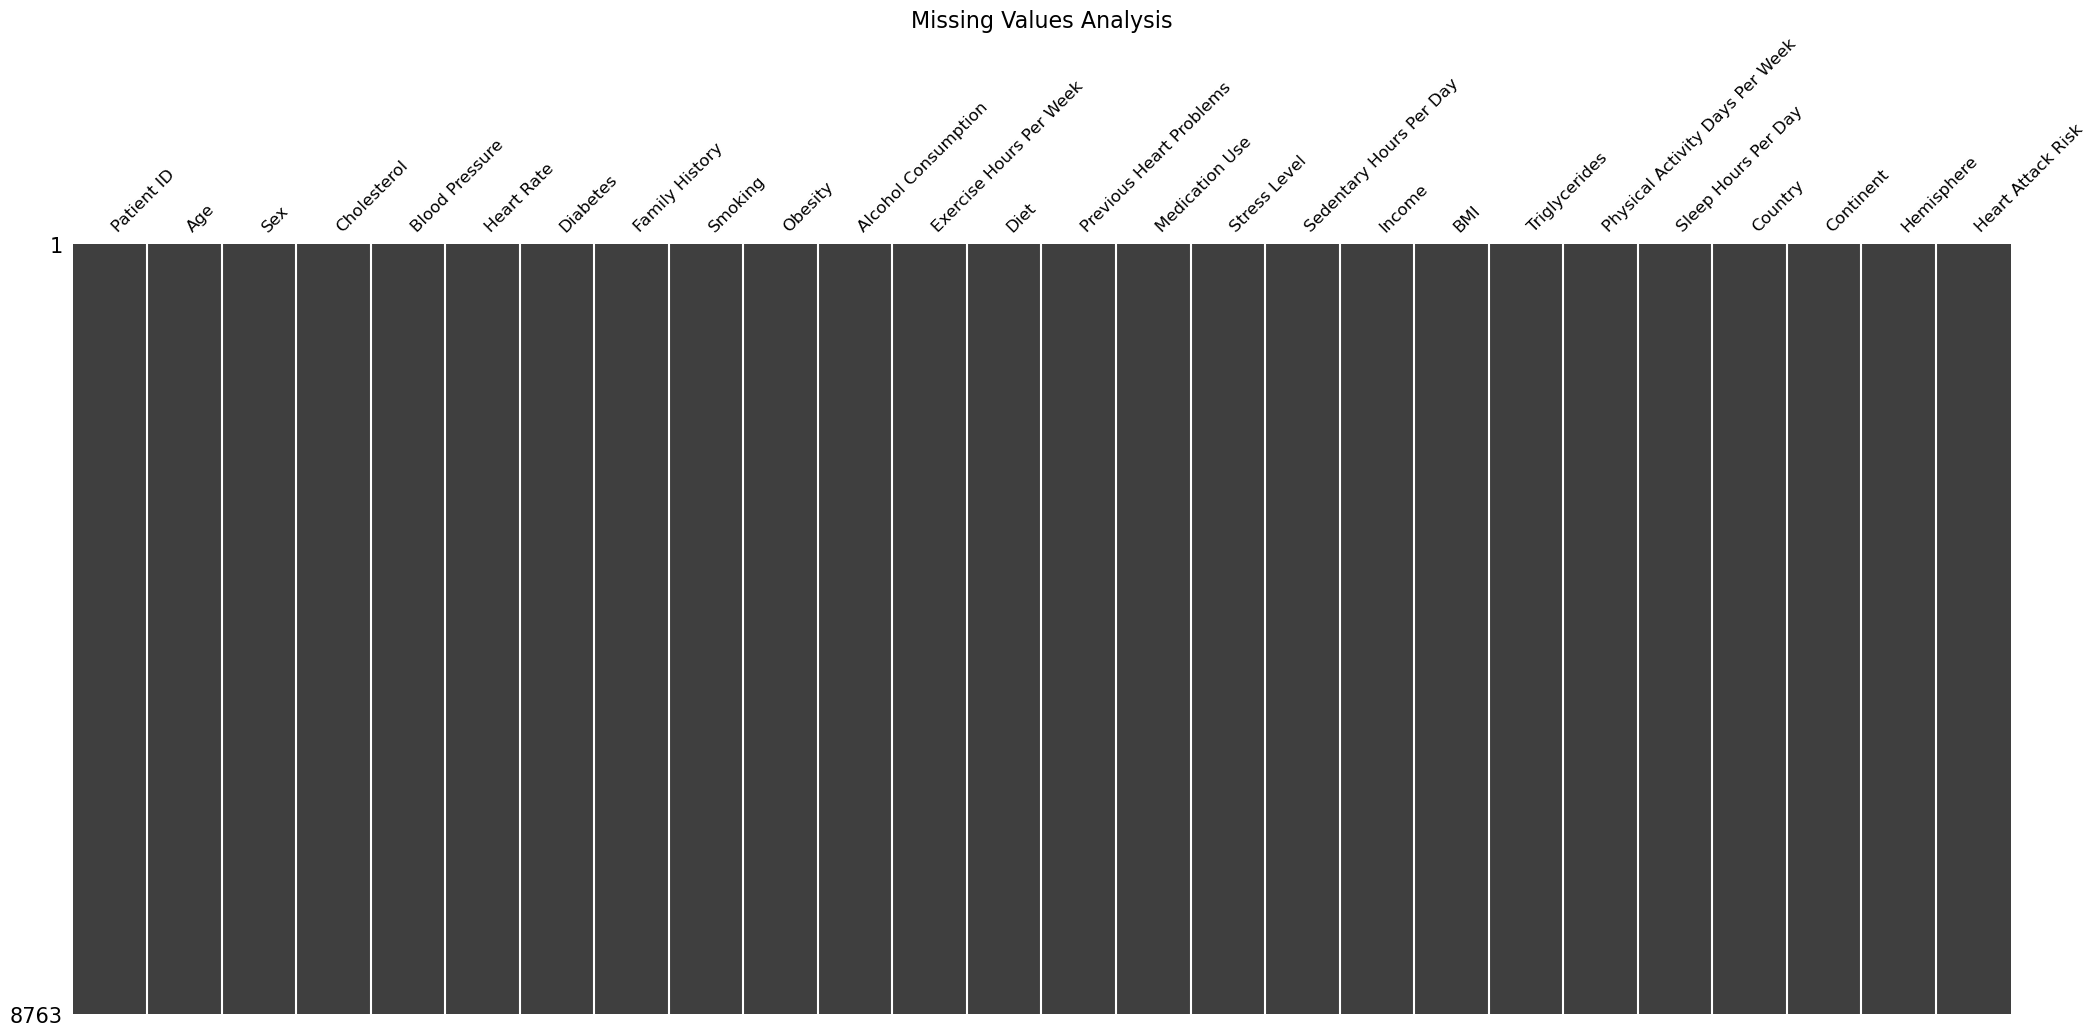

In [30]:
# Missing values analysis
plt.figure(figsize=(15, 6))
msno.matrix(df, sparkline=False, fontsize=12)
plt.title('Missing Values Analysis', fontsize=16)
plt.show()

In [31]:
# Duplicate analysis
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Entries: {duplicate_count}")


Duplicate Entries: 0


In [32]:
# Data type validation
data_types = df.dtypes
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Features:", categorical_cols.tolist())


Categorical Features: ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']


 3. Exploratory Data Analysis (EDA)

Target Distribution

/tmp/ipykernel_1126/2265941296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Heart Attack Risk', data=df, palette='viridis')


Text(0, 0.5, 'Count')

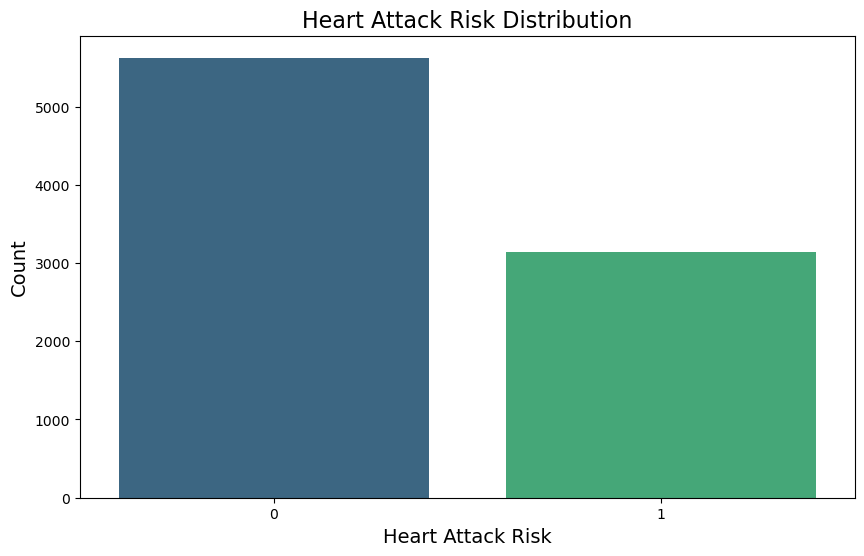

In [33]:
# Target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Heart Attack Risk', data=df, palette='viridis')
plt.title('Heart Attack Risk Distribution', fontsize=16)
plt.xlabel('Heart Attack Risk', fontsize=14)
plt.ylabel('Count', fontsize=14)

In [34]:
# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)
    
plt.show()

/tmp/ipykernel_1126/2904242820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Heart Attack Risk', data=df, palette='viridis')


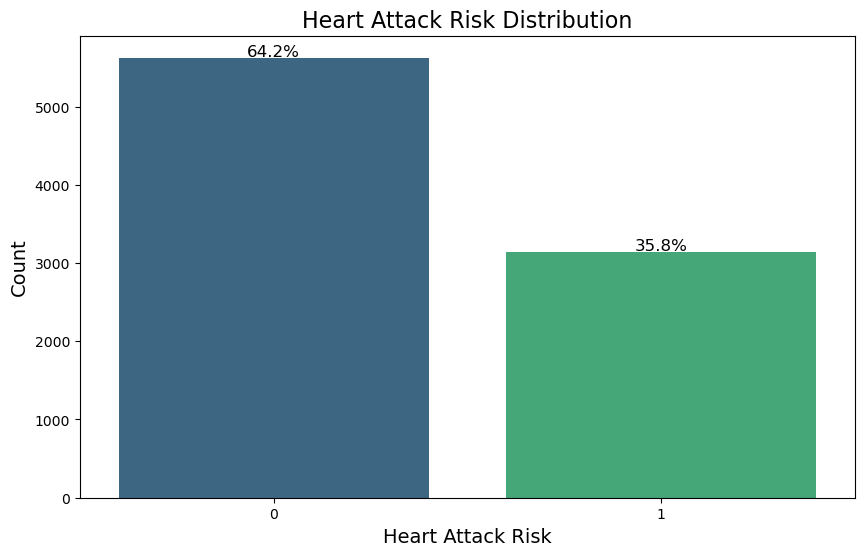

In [35]:
# Target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Heart Attack Risk', data=df, palette='viridis')
plt.title('Heart Attack Risk Distribution', fontsize=16)
plt.xlabel('Heart Attack Risk', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)
    
plt.show()

Feature Distributions

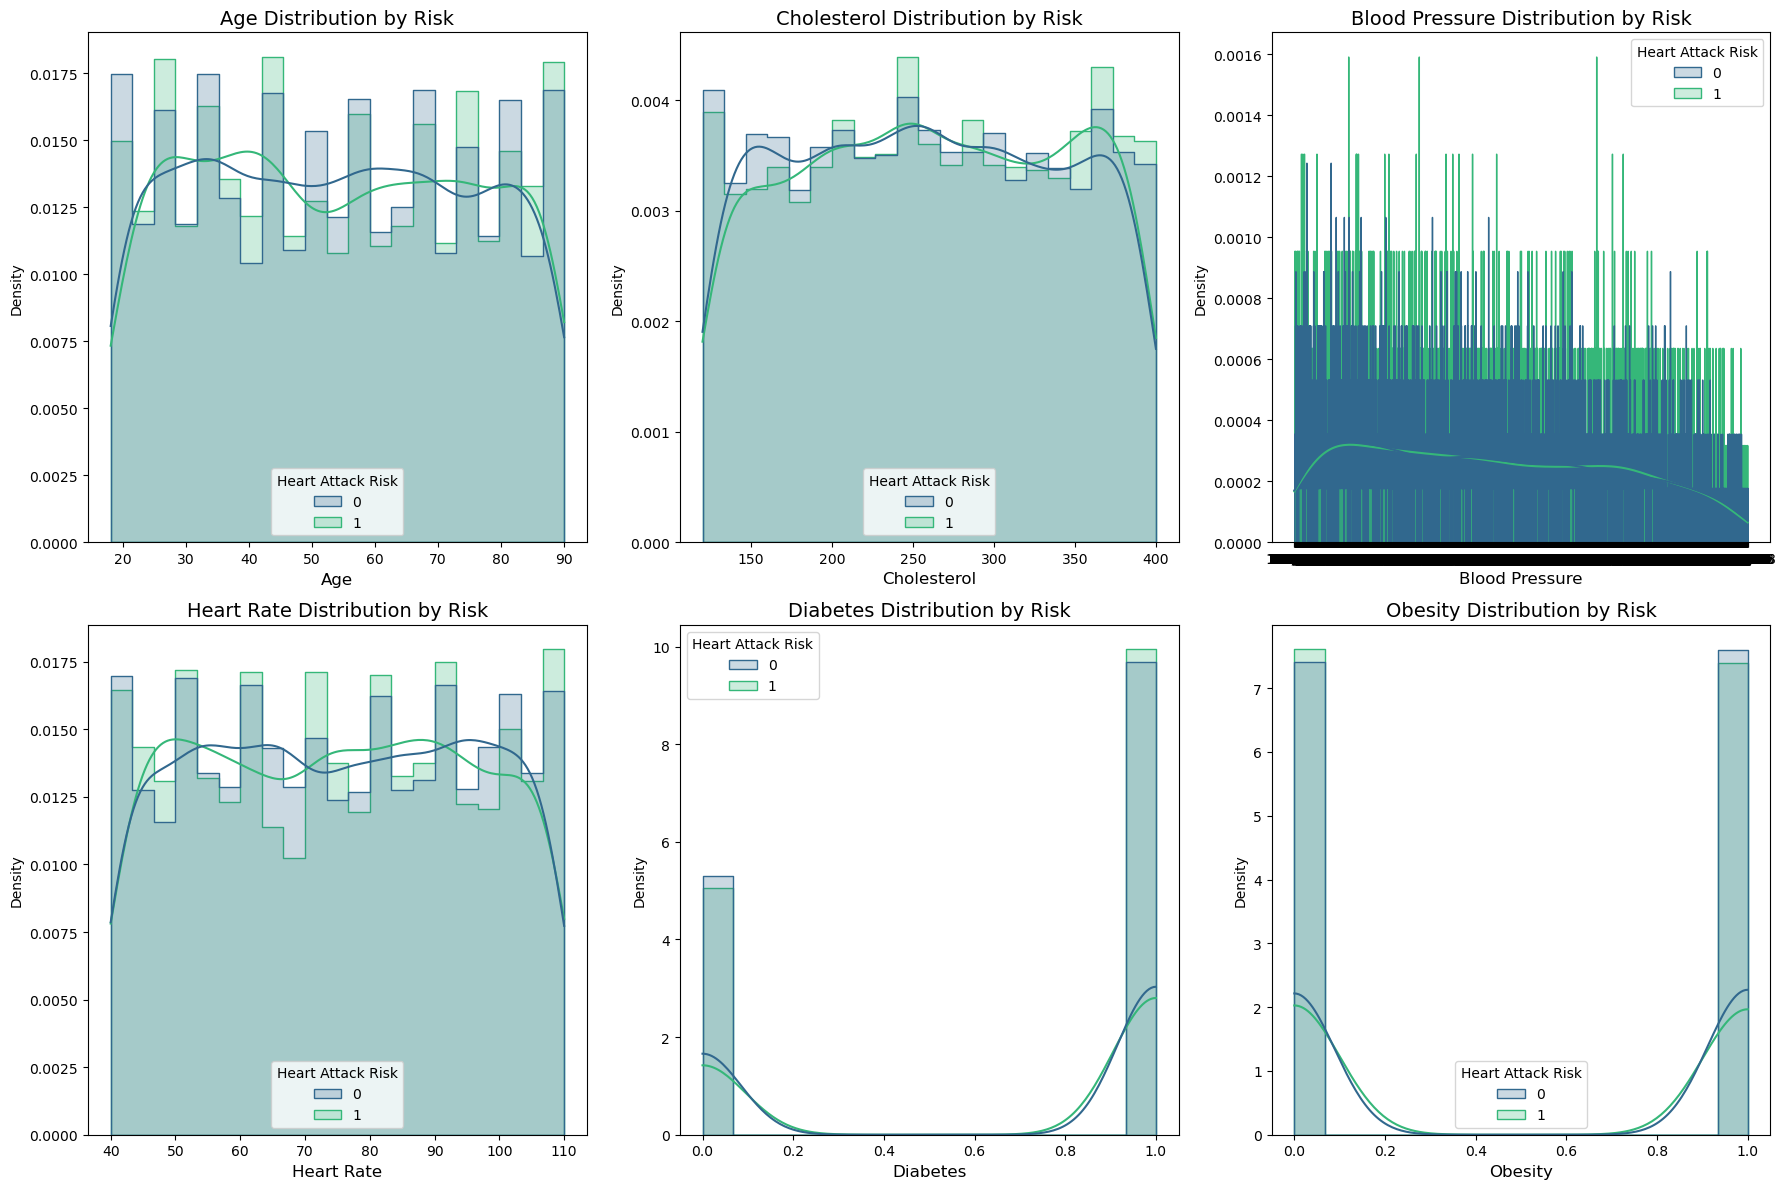

In [36]:
# Distribution of key features
features = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Obesity']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(
        data=df, 
        x=feature, 
        hue='Heart Attack Risk', 
        kde=True,
        ax=axes[i], 
        palette='viridis',
        element='step',
        stat='density',
        common_norm=False
    )
    axes[i].set_title(f'{feature} Distribution by Risk', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    
plt.tight_layout()
plt.show()

Correlation Analysis

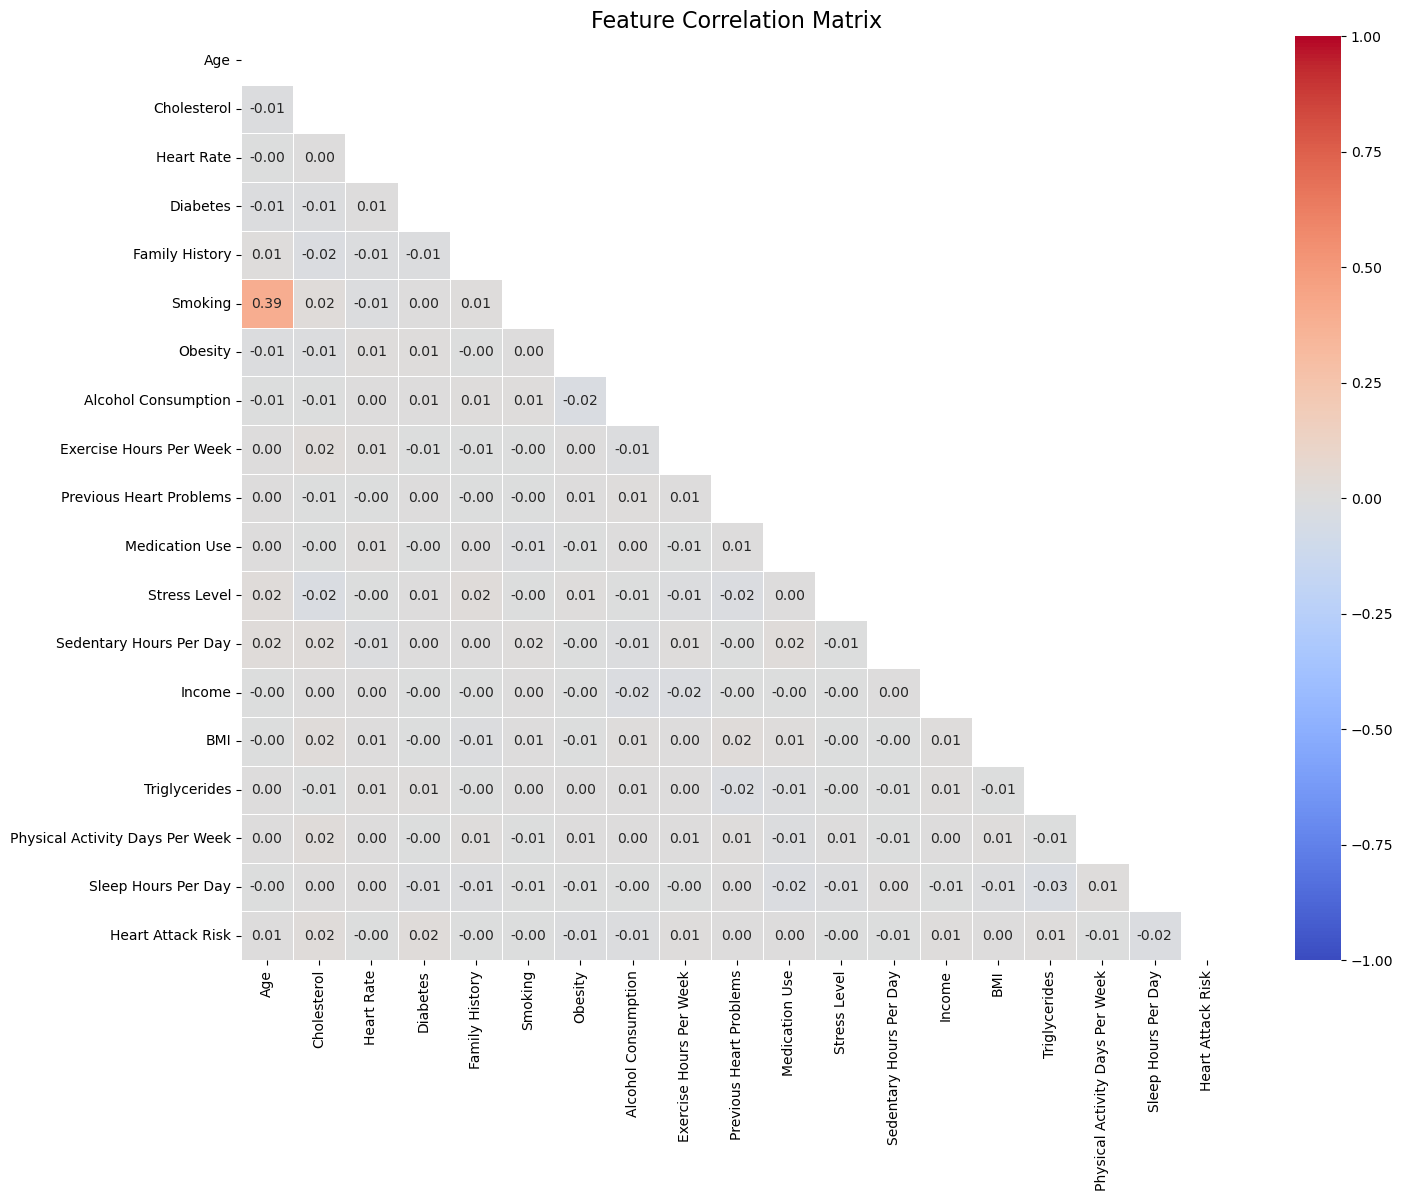

In [37]:
# Correlation matrix
plt.figure(figsize=(16, 12))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr, 
    mask=mask,
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1, 
    vmax=1
)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

In [38]:
# Interactive 3D plot of key features
fig = px.scatter_3d(
    df.sample(1000, random_state=42),
    x='Age',
    y='Cholesterol',
    z='Blood Pressure',
    color='Heart Attack Risk',
    symbol='Heart Attack Risk',
    opacity=0.7,
    title='3D Feature Space Visualization',
    height=800,
    color_continuous_scale='viridis'
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

STRONG DATA FILTERING SECTION

In [39]:
print("\nApplying advanced data filtering...")
original_df_size = len(df)


Applying advanced data filtering...


In [40]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy import stats
import os
import sys

In [42]:
# Define file paths and create output directory
input_file = r"/workspaces/Heart-Attack-Predictor/data/raw/heart_attack_prediction_dataset.csv"
output_file = r"/workspaces/Heart-Attack-Predictor/notebooks/FC212045_Kavindu/cleaned_heart_attack_data.csv"

# Create output directory if it doesn't exist
output_dir = os.path.dirname(output_file)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory: {output_dir}")


In [43]:
# : Check if input file exists
if not os.path.exists(input_file):
    print(f"Error: Input file not found at specified path.")
    print(f"Path: {input_file}")
    print("Please verify the file exists at this location.")
    sys.exit(1)
else:
    print("Input file found successfully!")

Input file found successfully!


In [44]:
# : Load dataset and show initial information
try:
    df = pd.read_csv(input_file)
    original_shape = df.shape
    print(f"Successfully loaded data: {original_shape[0]} rows, {original_shape[1]} columns")
    print("\nFirst 5 rows of original data:")
    display(df.head())
    
except Exception as e:
    print(f"\nError loading file: {str(e)}")
    sys.exit(1)

Successfully loaded data: 8763 rows, 26 columns

First 5 rows of original data:


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [45]:
# : Split blood pressure into separate columns
# Split blood pressure into systolic and diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df = df.drop(columns='Blood Pressure')

# Create pulse pressure feature
df['Pulse_Pressure'] = df['Systolic_BP'] - df['Diastolic_BP']

print("Blood pressure split into separate columns:")
display(df[['Systolic_BP', 'Diastolic_BP', 'Pulse_Pressure']].head())

Blood pressure split into separate columns:


,Systolic_BP,Diastolic_BP,Pulse_Pressure
0,158.0,88.0,70.0
1,165.0,93.0,72.0
2,174.0,99.0,75.0
3,163.0,100.0,63.0
4,91.0,88.0,3.0


In [46]:
# : Handle missing values
cols_to_check = ['Cholesterol', 'BMI', 'Triglycerides']
for col in cols_to_check:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled {df[col].isnull().sum()} missing values in {col} with median {median_val:.2f}")
    else:
        print(f"No missing values in {col}")

No missing values in Cholesterol
No missing values in BMI
No missing values in Triglycerides


In [47]:
# : Filter invalid medical values
valid_ranges = {
    'Age': (0, 120),
    'Cholesterol': (100, 600),
    'Systolic_BP': (70, 250),
    'Diastolic_BP': (40, 150),
    'Heart Rate': (30, 220),
    'BMI': (10, 60),
    'Triglycerides': (30, 1000),
    'Sleep Hours Per Day': (0, 24),
    'Exercise Hours Per Week': (0, 168)
}

initial_count = len(df)
print(f"Initial record count: {initial_count}")

for col, (min_val, max_val) in valid_ranges.items():
    before = len(df)
    df = df[(df[col] >= min_val) & (df[col] <= max_val)]
    removed = before - len(df)
    if removed > 0:
        print(f"Removed {removed} records with invalid {col} values")

print(f"\nTotal removed due to invalid medical values: {initial_count - len(df)}")
print(f"New record count: {len(df)}")

Initial record count: 8763

Total removed due to invalid medical values: 0
New record count: 8763


In [48]:
# : Handle outliers using winsorization
cols_to_winsorize = ['Cholesterol', 'Triglycerides', 'Systolic_BP', 'Income']
print("Winsorizing extreme values (top and bottom 1%):")

for col in cols_to_winsorize:
    # Show distribution before
    print(f"\n{col} before winsorization:")
    print(df[col].describe())
    
    # Winsorize
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
    
    # Show distribution after
    print(f"\n{col} after winsorization:")
    print(df[col].describe())

Winsorizing extreme values (top and bottom 1%):

Cholesterol before winsorization:
count    8763.000000
mean      259.877211
std        80.863276
min       120.000000
25%       192.000000
50%       259.000000
75%       330.000000
max       400.000000
Name: Cholesterol, dtype: float64

Cholesterol after winsorization:
count    8763.000000
mean      259.876640
std        80.824273
min       122.000000
25%       192.000000
50%       259.000000
75%       330.000000
max       398.000000
Name: Cholesterol, dtype: float64

Triglycerides before winsorization:
count    8763.000000
mean      417.677051
std       223.748137
min        30.000000
25%       225.500000
50%       417.000000
75%       612.000000
max       800.000000
Name: Triglycerides, dtype: float64

Triglycerides after winsorization:
count    8763.000000
mean      417.681730
std       223.618458
min        37.000000
25%       225.500000
50%       417.000000
75%       612.000000
max       794.000000
Name: Triglycerides, dtype: float6

/root/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning:


/root/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning:


/root/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning:


/root/miniforge3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning:




In [49]:
# : Encode categorical variables
# Binary features
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
print("Encoded Sex: Male=1, Female=0")

# Convert binary columns to integers
binary_cols = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 
               'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use']
for col in binary_cols:
    df[col] = df[col].astype(int)
    print(f"Converted {col} to integer")

# Diet encoding (ordinal)
diet_mapping = {'Unhealthy': 0, 'Average': 1, 'Healthy': 2}
df['Diet'] = df['Diet'].map(diet_mapping)
print("Encoded Diet: Unhealthy=0, Average=1, Healthy=2")

# Continent encoding (one-hot)
df = pd.get_dummies(df, columns=['Continent'], prefix='Cont', drop_first=True)
print("One-hot encoded Continent")

print("\nData types after encoding:")
print(df.dtypes.value_counts())

Encoded Sex: Male=1, Female=0
Converted Diabetes to integer
Converted Family History to integer
Converted Smoking to integer
Converted Obesity to integer
Converted Alcohol Consumption to integer
Converted Previous Heart Problems to integer
Converted Medication Use to integer
Encoded Diet: Unhealthy=0, Average=1, Healthy=2
One-hot encoded Continent

Data types after encoding:
int64      18
float64     6
bool        5
object      3
Name: count, dtype: int64


In [51]:
# : Feature engineering
# Hypertension flag
df['Hypertension'] = ((df['Systolic_BP'] >= 140) | (df['Diastolic_BP'] >= 90)).astype(int)
print(f"Hypertension cases: {df['Hypertension'].sum()}")

# Metabolic syndrome risk
df['Metabolic_Risk'] = (
    (df['BMI'] >= 30) | 
    (df['Triglycerides'] >= 150) | 
    (df['Cholesterol'] >= 240)
).astype(int)
print(f"Metabolic syndrome risk cases: {df['Metabolic_Risk'].sum()}")

# Activity imbalance
df['Sedentary_Ratio'] = df['Sedentary Hours Per Day'] / (df['Exercise Hours Per Week']/7 + 1e-6)
print("Created Sedentary_Ratio feature")

print("\nNew features summary:")
display(df[['Hypertension', 'Metabolic_Risk', 'Sedentary_Ratio']].describe())

Hypertension cases: 5971
Metabolic syndrome risk cases: 8413
Created Sedentary_Ratio feature

New features summary:


,Hypertension,Metabolic_Risk,Sedentary_Ratio
count,8763.000000,8763.000000,8763.000000
mean,0.681388,0.960059,21.791371
std,0.465965,0.195831,220.858348
min,0.000000,0.000000,0.000988
25%,0.000000,1.000000,2.129784
50%,1.000000,1.000000,4.192163
75%,1.000000,1.000000,8.423461
max,1.000000,1.000000,11077.106875


In [52]:
# : Final data check and save
print("Final data check:")
print(f"Total records: {len(df)}")
print(f"Total features: {len(df.columns)}")
print("\nFirst 3 rows of cleaned data:")
display(df.head(3))

# Save cleaned data
df.to_csv(output_file, index=False)
print(f"\nSaved cleaned data to: {output_file}")
print(f"Original shape: {original_shape}")
print(f"Cleaned shape: {df.shape}")
print(f"Total records removed: {original_shape[0] - len(df)}")

Final data check:
Total records: 8763
Total features: 35

First 3 rows of cleaned data:


,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diastolic_BP,Pulse_Pressure,Cont_Asia,Cont_Australia,Cont_Europe,Cont_North America,Cont_South America,Hypertension,Metabolic_Risk,Sedentary_Ratio
0,BMW7812,67,1,208,72,0,0,1,0,0,...,88.0,70.0,False,False,False,False,True,1,1,11.109125
1,CZE1114,21,1,389,98,1,1,1,1,1,...,93.0,72.0,False,False,False,True,False,1,1,19.161306
2,BNI9906,21,0,324,72,1,0,0,0,0,...,99.0,75.0,False,False,True,False,False,1,1,31.873199



Saved cleaned data to: /workspaces/Heart-Attack-Predictor/notebooks/FC212045_Kavindu/cleaned_heart_attack_data.csv
Original shape: (8763, 26)
Cleaned shape: (8763, 35)
Total records removed: 0
